In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

**DATA LOAD**

In [3]:
data=pd.read_csv("../DataSets/Airbnb_Open_Data.csv")

C:\Users\asus\AppData\Local\Temp\ipykernel_17052\1366509937.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("../DataSets/Airbnb_Open_Data.csv")


In [4]:
data

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


In [5]:
data.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

**HANDLING MISSING DATA & FILLING/DROPPING NAN VALUES**

In [7]:
data.columns=data.columns.str.replace(" ","")

In [8]:
data.columns

Index(['id', 'NAME', 'hostid', 'host_identity_verified', 'hostname',
       'neighbourhoodgroup', 'neighbourhood', 'lat', 'long', 'country',
       'countrycode', 'instant_bookable', 'cancellation_policy', 'roomtype',
       'Constructionyear', 'price', 'servicefee', 'minimumnights',
       'numberofreviews', 'lastreview', 'reviewspermonth', 'reviewratenumber',
       'calculatedhostlistingscount', 'availability365', 'house_rules',
       'license'],
      dtype='object')

In [9]:
data.columns = ['Id', 'Name', 'Host_Id','Host_Identity_Verified','Host_Name','Neighbourhoodgroup','Neighbourhood','Latitude','Longitude','Country',
                'Country_Code','Instant_Bookable','Cancellation_Policy','Room_Type','Construction_Year','Price','Service_Fee','Minimum_Nights',
         'Number_Of_Reviews','Last_Review','Reviews_Per_Month','Rating','Calculated_Host_Listed_Count','Availability_In_Days','House_Rules','License']


In [10]:
data.isnull().sum()

Id                                   0
Name                               250
Host_Id                              0
Host_Identity_Verified             289
Host_Name                          406
Neighbourhoodgroup                  29
Neighbourhood                       16
Latitude                             8
Longitude                            8
Country                            532
Country_Code                       131
Instant_Bookable                   105
Cancellation_Policy                 76
Room_Type                            0
Construction_Year                  214
Price                              247
Service_Fee                        273
Minimum_Nights                     409
Number_Of_Reviews                  183
Last_Review                      15893
Reviews_Per_Month                15879
Rating                             326
Calculated_Host_Listed_Count       319
Availability_In_Days               448
House_Rules                      52131
License                  

In [11]:
data = data.dropna(subset=['Name','Neighbourhoodgroup','Neighbourhood','Instant_Bookable','Construction_Year'])

In [13]:
# Fillig Nan Values with Respectives Column
data=data.fillna({"Host_Identity_Verified":"unconfirmed"})
data=data.fillna({"Country": "United States"})
data=data.fillna({"Country_Code": "US"})
data=data.fillna({"License": "41662/AL"})
data.Host_Name=data.Host_Name.fillna("Unknown_Host")
data.Cancellation_Policy=data.Cancellation_Policy.fillna("Not_ Mentioned")
data.Minimum_Nights=data.Minimum_Nights.fillna("1")
data.Last_Review=data.Last_Review.fillna("No_Reviews")
data.House_Rules=data.House_Rules.fillna("No_Specific_Rules")


In [14]:
data=data.fillna(0)

C:\Users\asus\AppData\Local\Temp\ipykernel_17052\1211765249.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data=data.fillna(0)


In [15]:
# Replace Strings($,-) to get numeric Column
data.Price=data.Price.replace("[$,]","",regex=True).astype("int64")
data.Service_Fee=data.Service_Fee.replace("[$,]","",regex=True).astype("int64")
data["Minimum_Nights"] = data["Minimum_Nights"].astype(str).str.replace(r"[-]", "", regex=True).str.strip()
data['Availability_In_Days'] = data['Availability_In_Days'].astype(str).str.replace("-", "",regex=True)
data["Neighbourhoodgroup"] = data["Neighbourhoodgroup"].replace("brookln", "Brooklyn")


In [16]:
data.isnull().sum()

Id                              0
Name                            0
Host_Id                         0
Host_Identity_Verified          0
Host_Name                       0
Neighbourhoodgroup              0
Neighbourhood                   0
Latitude                        0
Longitude                       0
Country                         0
Country_Code                    0
Instant_Bookable                0
Cancellation_Policy             0
Room_Type                       0
Construction_Year               0
Price                           0
Service_Fee                     0
Minimum_Nights                  0
Number_Of_Reviews               0
Last_Review                     0
Reviews_Per_Month               0
Rating                          0
Calculated_Host_Listed_Count    0
Availability_In_Days            0
House_Rules                     0
License                         0
dtype: int64

In [17]:
data.dtypes

Id                                int64
Name                             object
Host_Id                           int64
Host_Identity_Verified           object
Host_Name                        object
Neighbourhoodgroup               object
Neighbourhood                    object
Latitude                        float64
Longitude                       float64
Country                          object
Country_Code                     object
Instant_Bookable                   bool
Cancellation_Policy              object
Room_Type                        object
Construction_Year               float64
Price                             int64
Service_Fee                       int64
Minimum_Nights                   object
Number_Of_Reviews               float64
Last_Review                      object
Reviews_Per_Month               float64
Rating                          float64
Calculated_Host_Listed_Count    float64
Availability_In_Days             object
House_Rules                      object


In [18]:
data.Construction_Year=data.Construction_Year.astype("int64")
data.Minimum_Nights=data.Minimum_Nights.astype("float")
data.Number_Of_Reviews=data.Number_Of_Reviews.astype("int64")
data.Calculated_Host_Listed_Count=data.Calculated_Host_Listed_Count.astype("int64")
data.Availability_In_Days=data.Availability_In_Days.astype("float")
data["Last_Reviews"]=pd.to_datetime(data['Last_Review'], errors="coerce")
data.Availability_In_Days=data.Availability_In_Days.astype("int64")
data.Minimum_Nights=data.Minimum_Nights.astype("int64")

In [19]:
data.dtypes

Id                                       int64
Name                                    object
Host_Id                                  int64
Host_Identity_Verified                  object
Host_Name                               object
Neighbourhoodgroup                      object
Neighbourhood                           object
Latitude                               float64
Longitude                              float64
Country                                 object
Country_Code                            object
Instant_Bookable                          bool
Cancellation_Policy                     object
Room_Type                               object
Construction_Year                        int64
Price                                    int64
Service_Fee                              int64
Minimum_Nights                           int64
Number_Of_Reviews                        int64
Last_Review                             object
Reviews_Per_Month                      float64
Rating       

In [20]:
data

,Id,Name,Host_Id,Host_Identity_Verified,Host_Name,Neighbourhoodgroup,Neighbourhood,Latitude,Longitude,Country,...,Minimum_Nights,Number_Of_Reviews,Last_Review,Reviews_Per_Month,Rating,Calculated_Host_Listed_Count,Availability_In_Days,House_Rules,License,Last_Reviews
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,10,9,10/19/2021,0.21,4.0,6,286,Clean up and treat the home the way you'd like...,41662/AL,2021-10-19
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,30,45,5/21/2022,0.38,4.0,2,228,Pet friendly but please confirm with me if the...,41662/AL,2022-05-21
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,3,0,No_Reviews,0.00,5.0,1,352,"I encourage you to use my kitchen, cooking and...",41662/AL,NaT
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,10,9,11/19/2018,0.10,3.0,1,289,"Please no smoking in the house, porch or on th...",41662/AL,2018-11-19
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,3,74,6/22/2019,0.59,3.0,1,374,"No smoking, please, and no drugs.",41662/AL,2019-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,1,0,No_Reviews,0.00,3.0,1,227,No Smoking No Parties or Events of any kind Pl...,41662/AL,NaT
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,1,1,7/6/2015,0.02,2.0,2,395,House rules: Guests agree to the following ter...,41662/AL,2015-07-06
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,3,0,No_Reviews,0.00,5.0,1,342,No_Specific_Rules,41662/AL,NaT
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,2,5,10/11/2015,0.10,3.0,1,386,No_Specific_Rules,41662/AL,2015-10-11


**ANALYSIS**

**DEMOGRAPHIC ANALYSIS**

**1.Listing By NeighbourHood Group**

C:\Users\asus\AppData\Local\Temp\ipykernel_17052\548620528.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x=sb.countplot(x=data.Neighbourhoodgroup,palette="coolwarm")


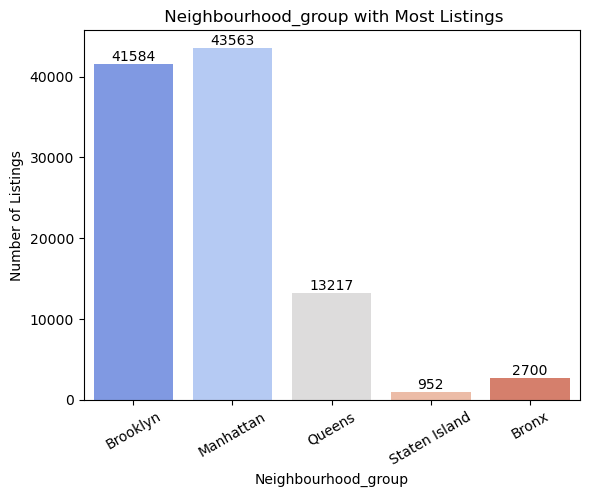

In [24]:
# Listings Count Per Neighborhood_group
x=sb.countplot(x=data.Neighbourhoodgroup,palette="coolwarm")
x.bar_label(x.containers[0])
x.bar_label(x.containers[1])
x.bar_label(x.containers[2])
x.bar_label(x.containers[3])
x.bar_label(x.containers[4])
plt.title(" Neighbourhood_group with Most Listings")
plt.xlabel("Neighbourhood_group")
plt.ylabel("Number of Listings")
plt.xticks(rotation=30)
plt.show()

***Key Insights From Neighbourhood Group Listing Chart:-**

+ Manhattan And Brooklyn have the highest number of listings, with Over 40,000. It is Primary Choice for Visitors.
+ Queen has much lower number of listings(around 15,000) , it is secondary Choice for Visitors.
+ State Island And Bronx have Significantly fever listings.In comparison to the top three, these localities have a lot less listings.

**Lisitng Per Neighbourhood**

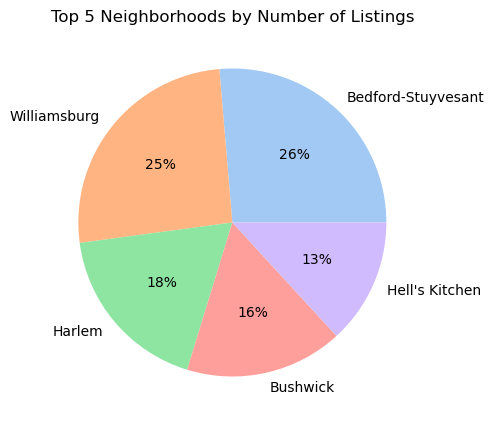

In [28]:
plt.figure(figsize=(10, 5))
top_neighborhoods = data["Neighbourhood"].value_counts().head(5)  
plt.pie(top_neighborhoods, labels=top_neighborhoods.index, autopct="%d%%", colors=sb.color_palette("pastel"))
plt.title("Top 5 Neighborhoods by Number of Listings")
plt.show()

**1. Bedford-Stuyvesant & Williamsburg  These two neighborhoods contribute the most listings (26% and 25%, resp.) indicating high Airbnb activity.  
  2. Harlem & Bushwick Are Also Popular – They contributes 18% and 16% of listings, suggesting significant Airbnb presence.  
  3. Hell's Kitchen has Relatively Lower Shares i.e. 13% of listings Among All Top 5 Neighbourhood.**   

**Listing By Room Type**

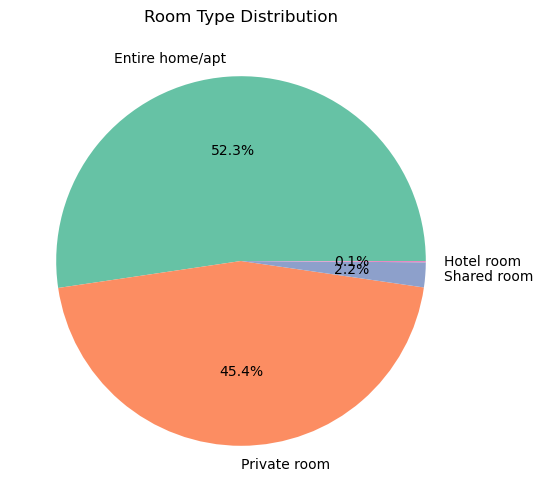

In [31]:
#Room Type Distribution by Number of Listing
plt.figure(figsize=(10, 6))
Roomtype= data["Room_Type"].value_counts()
plt.pie(Roomtype, labels=Roomtype.index, autopct="%1.1f%%", colors=sb.color_palette("Set2"))
plt.title("Room Type Distribution")
plt.show()

**Key Insights:  
1.The Majority Listings Are Entire Home/Apt That contained  52.3% of all over listings, Most listings are full apartments or homes, indicating a focus on vacation rentals rather than shared spaces.  
2.Nearly Half of listings Are Private Rooms(45.4%), Making Then Popular Choice For Solo Travel & for Privacy.  
3.Shared Room are Extremly Rare Showing that Hostel-Style Accomodation.   
4.Hotel Rooms Have Minor Presence indicating Short term Rental Platform.**
 

Text(0.5, 1.0, 'Top 10 hosts on the basis of no. of listings')

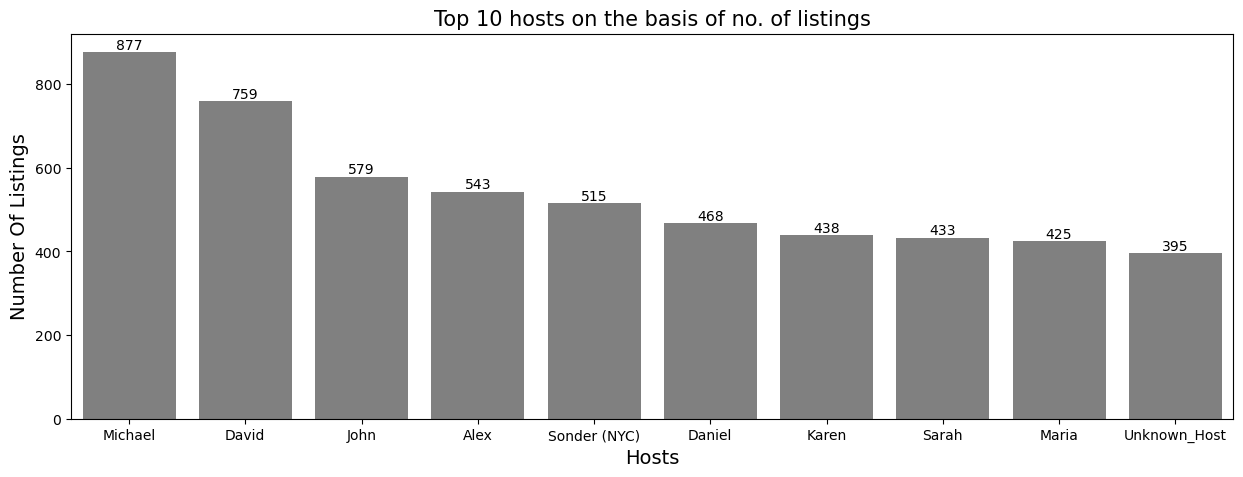

In [33]:
# bar plot of the top 10 hosts with no. of listing
top_hosts = data['Host_Name'].value_counts().head(10)
plt.figure(figsize=[15,5])
x=sb.barplot(x=top_hosts.index,y=top_hosts.values,color="Gray")
x.bar_label(x.containers[0])
plt.xlabel('Hosts', fontsize=14)
plt.ylabel('Number Of Listings', fontsize=14)
plt.title('Top 10 hosts on the basis of no. of listings', fontsize=15)

In [34]:
# Data Description By Best Rating
top_rated = data.dropna(subset=["Rating"]).sort_values(by="Rating", ascending=False).head(10)
top_rated[["Name","Price" ,"Rating", "Minimum_Nights","Availability_In_Days", "Neighbourhood", "Neighbourhoodgroup"]]


,Name,Price,Rating,Minimum_Nights,Availability_In_Days,Neighbourhood,Neighbourhoodgroup
28680,Cute 2-BR in Greenpoint/Williamsburg,430,5.0,3,0,Greenpoint,Brooklyn
30306,Your Chic NYC 1 bed Apt near Central Park,483,5.0,5,104,Upper West Side,Manhattan
75875,A Small Room With Futon Bed In A House In Broo...,562,5.0,1,0,Prospect-Lefferts Gardens,Brooklyn
30382,Hotel-like Studio- loft Wall Street,280,5.0,2,85,Financial District,Manhattan
30378,5mins to train; New York Modern Home- (5),758,5.0,2,126,Jackson Heights,Queens
30375,2 Bathrooms-Modern Room in Queens (3),418,5.0,2,125,Jackson Heights,Queens
30373,"3 BdRm Apt, 8min to LGA & 25mins to JFK,Manhattan",494,5.0,2,89,East Elmhurst,Queens
30369,Prime Location 3 Bedrroms Apartment,520,5.0,30,145,Kips Bay,Manhattan
30365,Perfect room in between walks&fun in Manhattan,1085,5.0,3,339,Upper West Side,Manhattan
30364,STUDIO - Boho Chic Sanctuary in Lower East Side,400,5.0,4,0,Chinatown,Manhattan


**Average Price By Neighbourhood Group**

Text(0.5, 1.0, 'Average Price by Neighbourhood Group')

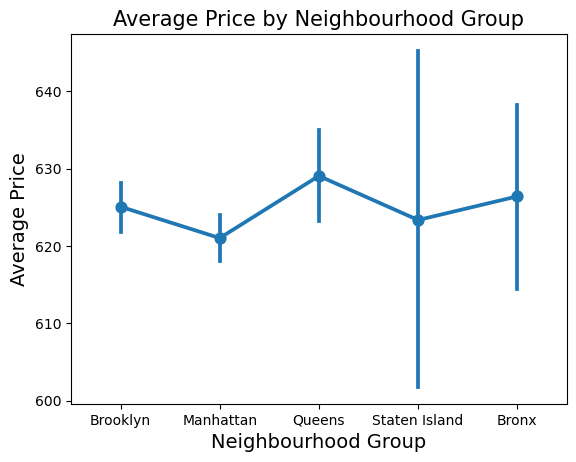

In [36]:
# Price Distribution across Neighbourhood Groups
sb.pointplot(x =data.Neighbourhoodgroup, y=data.Price)
# Add axis labels and a title
plt.xlabel('Neighbourhood Group',fontsize=14)
plt.ylabel('Average Price',fontsize=14)
plt.title('Average Price by Neighbourhood Group',fontsize=15)

**Key Insights From Average Price By Neighbourhood groups:**  
 + Brooklyn and Manhattan Shows Relatively Stable Average price Around 618 to 630.    
 + Queen shows High Average price around $630 which is highest Average price Followed By Brooklyn and Manhattan.    
 + Staten Island Shows the Variablity with Prices Ranging Between Around 600 to 645. This could be indicate Occasional High Pricing Due to Low Listing Volume.  
 + Bronx has Comparable Price with other Areas but it shows Wider Range of Price. This might be due the Combination Luxury Listing and Budget Accomodation.

**Availability Patterns Across Locations**


**Average Price By Neighbourhood**

C:\Users\asus\AppData\Local\Temp\ipykernel_17052\1251321975.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x=sb.barplot(x=avg_price_neigh.index, y=avg_price_neigh.values, palette="coolwarm")


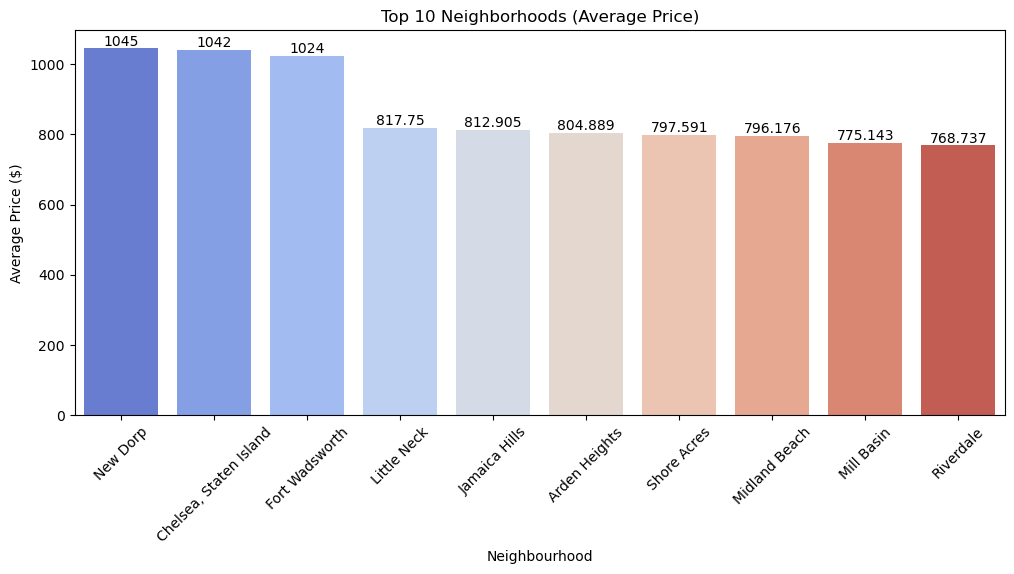

In [40]:
# Price Distribution across Neighbourhood 
plt.figure(figsize=(12,5))
avg_price_neigh = data.groupby("Neighbourhood")["Price"].mean().sort_values(ascending=False).head(10)
x=sb.barplot(x=avg_price_neigh.index, y=avg_price_neigh.values, palette="coolwarm")
x.bar_label(x.containers[0])
x.bar_label(x.containers[1])
x.bar_label(x.containers[2])
x.bar_label(x.containers[3])
x.bar_label(x.containers[4])
x.bar_label(x.containers[5])
x.bar_label(x.containers[6])
x.bar_label(x.containers[7])
x.bar_label(x.containers[8])
x.bar_label(x.containers[9])
plt.title("Top 10 Neighborhoods (Average Price)")
plt.xlabel("Neighbourhood")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=45)
plt.show()

**Key Insights From Average Price By Neighbourhood**
+ New Drop, Satten Island and Fort Wadsworth Shows Relatively Stable Average price Around $150.
+ Others shows Relatively Same Avearge Price Around 700 to 820.

**Availability of Neighborhood in Days**

C:\Users\asus\AppData\Local\Temp\ipykernel_17052\881259417.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x=sb.barplot(x=Availability.index, y=Availability.values, palette="magma")


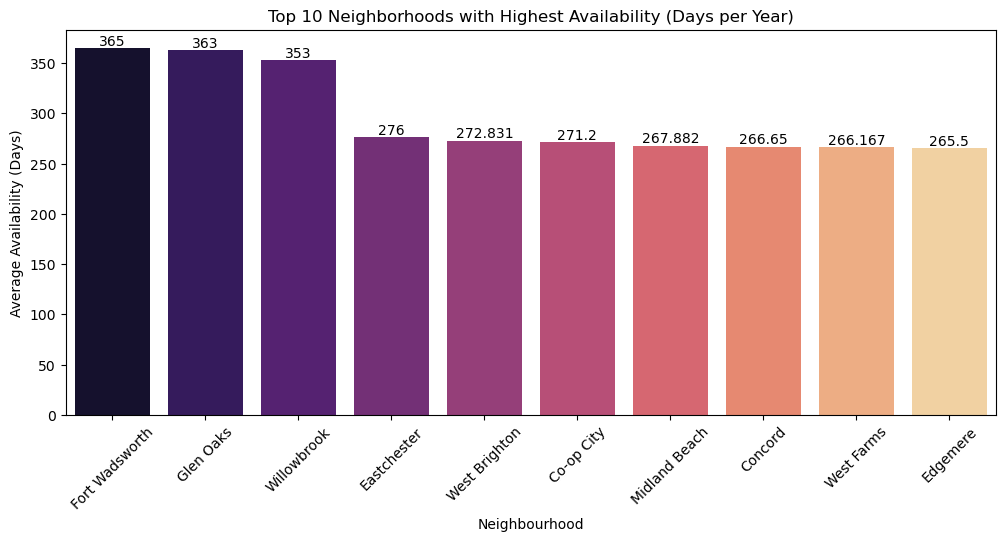

In [43]:
# Availability of top 1o neighbourhood in Days
plt.figure(figsize=(12,5))
Availability = data.groupby('Neighbourhood')['Availability_In_Days'].mean().sort_values(ascending=False).head(10)

x=sb.barplot(x=Availability.index, y=Availability.values, palette="magma")
x.bar_label(x.containers[0])
x.bar_label(x.containers[1])
x.bar_label(x.containers[2])
x.bar_label(x.containers[3])
x.bar_label(x.containers[4])
x.bar_label(x.containers[5])
x.bar_label(x.containers[6])
x.bar_label(x.containers[7])
x.bar_label(x.containers[8])
x.bar_label(x.containers[9])
plt.title("Top 10 Neighborhoods with Highest Availability (Days per Year)")
plt.xlabel("Neighbourhood")
plt.ylabel("Average Availability (Days)")
plt.xticks(rotation=45)
plt.show()


**Key Insights From Availability of Neighbourhood In Days**
+ Fort Wadsworth is the only one Neighbourhood that will available in all 365 days.
+ Glen Oaks & Willowbrook Both Shows the avilabilty(in days) about 350 to 360 days.
+ Other Cities Relatively Shows the Same Days of Availability of Around 270 or less than 270, that will be less as Compare to Fort Wadsworth, Glen Oaks and Willowbrook.

C:\Users\asus\AppData\Local\Temp\ipykernel_17052\1795628750.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x=sb.barplot(x=Availability.index, y=Availability.values, palette="magma")


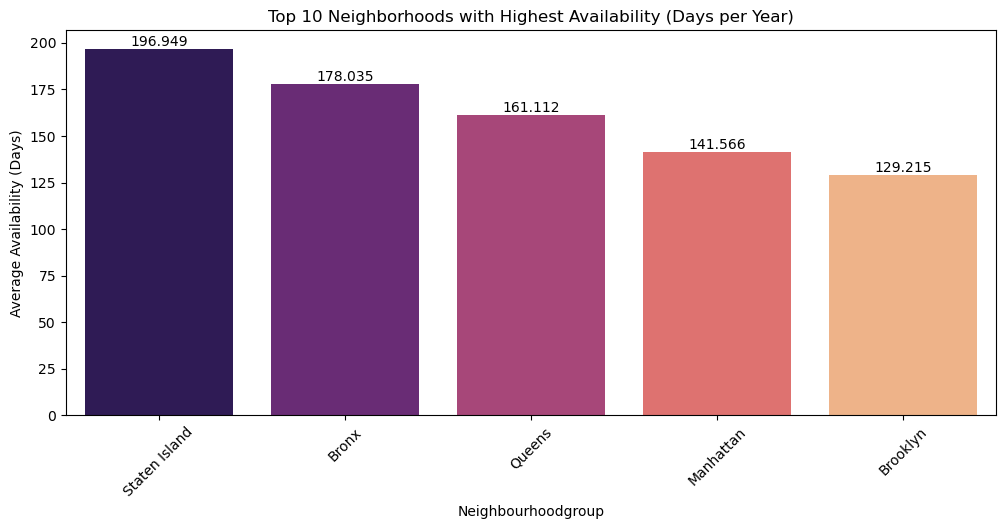

In [44]:
# Availability of top 1o neighbourhood Groups in Days
plt.figure(figsize=(12,5))
Availability = data.groupby('Neighbourhoodgroup')['Availability_In_Days'].mean().sort_values(ascending=False)

x=sb.barplot(x=Availability.index, y=Availability.values, palette="magma")
x.bar_label(x.containers[0])
x.bar_label(x.containers[1])
x.bar_label(x.containers[2])
x.bar_label(x.containers[3])
x.bar_label(x.containers[4])

plt.title("Top 10 Neighborhoods with Highest Availability (Days per Year)")
plt.xlabel("Neighbourhoodgroup")
plt.ylabel("Average Availability (Days)")
plt.xticks(rotation=45)
plt.show()


**Key Insights From Availability of Neighbourhood groups In Days**
+ Staten Island Has the Highest Availability – Listings in Staten Island are available for nearly 200 days per year, the highest among neighborhoods.
+ Brooklyn Has the Lowest Availability – Brooklyn's listings are available for the least number of days, suggesting either higher occupancy or more restrictions.
+ General Trend – Availability tends to be higher in less central boroughs (Staten Island, Bronx) and lower in high-demand areas (Manhattan, Brooklyn).

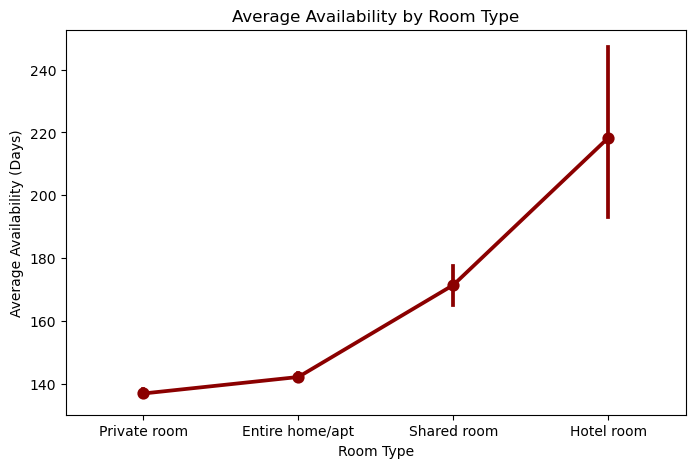

In [45]:
#Availability by Room Type
plt.figure(figsize=(8,5))
sb.pointplot(data,x="Room_Type", y="Availability_In_Days",  color="darkred", markers="o")
plt.title("Average Availability by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average Availability (Days)")
plt.show()

**key Insights From Availaility By Room Types**
+ Hotel Rooms Have the Highest Availability – Hotels are available for over 220 days per year, significantly more than other room types.
+ Private Rooms Have the Lowest Availability – Private rooms are available for around 135-140 days per year, indicating lower availability compared to other categories.
+ Increase in Availability – Availability increases progressively from private rooms to hotel rooms, likely due to professional hosting and fewer personal usage restrictions.
+ Higher availability for hotel rooms and shared rooms may indicate Privacy & Less Restictions While less Availability for  Private Rooms May Indicate more part time Hosts.

**Neighbourhood Wise Rating**

C:\Users\asus\AppData\Local\Temp\ipykernel_17052\2443171059.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x=sb.barplot(x=avg_ratings.index, y=avg_ratings.values, palette="crest")


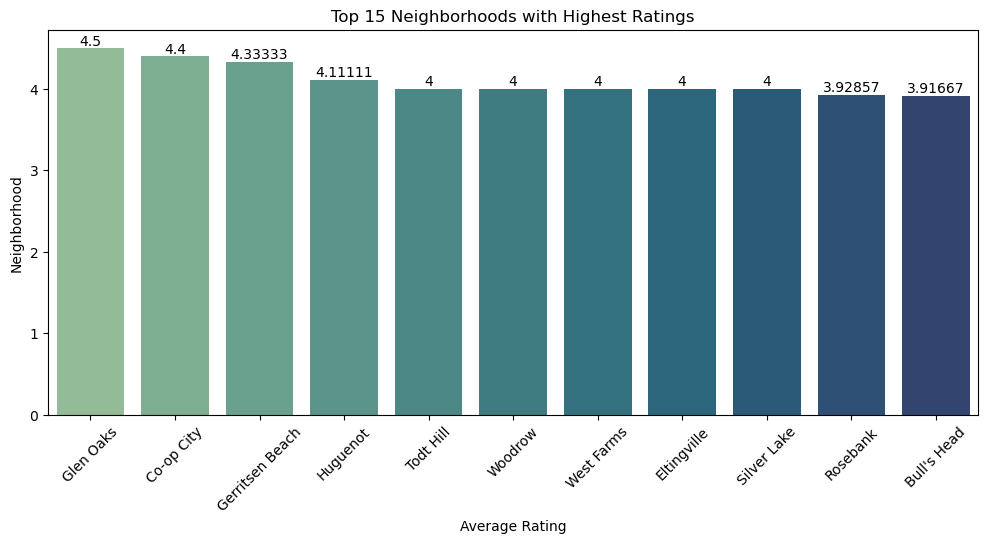

In [134]:


# Rating Distribution Across Different Neighbourhood
plt.figure(figsize=(12,5))
avg_ratings = data.groupby("Neighbourhood")["Rating"].mean().sort_values(ascending=False).head(11)

x=sb.barplot(x=avg_ratings.index, y=avg_ratings.values, palette="crest")
x.bar_label(x.containers[0])
x.bar_label(x.containers[1])
x.bar_label(x.containers[2])
x.bar_label(x.containers[3])
x.bar_label(x.containers[4])
x.bar_label(x.containers[5])
x.bar_label(x.containers[6])
x.bar_label(x.containers[7])
x.bar_label(x.containers[8])
x.bar_label(x.containers[9])
x.bar_label(x.containers[10])
plt.title("Top 15 Neighborhoods with Highest Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Neighborhood")
plt.xticks(rotation=45)
plt.show()

**Key Insights From Neighbourhood wise Rating**
+ High-Quality Experiences – Glen Oaks and Co-op City have the highest ratings, suggesting excellent guest experiences and satisfaction.
+  Consistency in Ratings – The majority of neighborhoods maintain high ratings, likely due to good host management and guest satisfaction.
+  Neighborhoods like Rosebank & Bull's Head, although still highly rated, could focus on minor improvements to further enhance guest experience.

**Average Price vs Room Type**

C:\Users\asus\AppData\Local\Temp\ipykernel_17052\2529242879.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x=sb.pointplot(data, x="Room_Type", y="Price",palette="coolwarm")


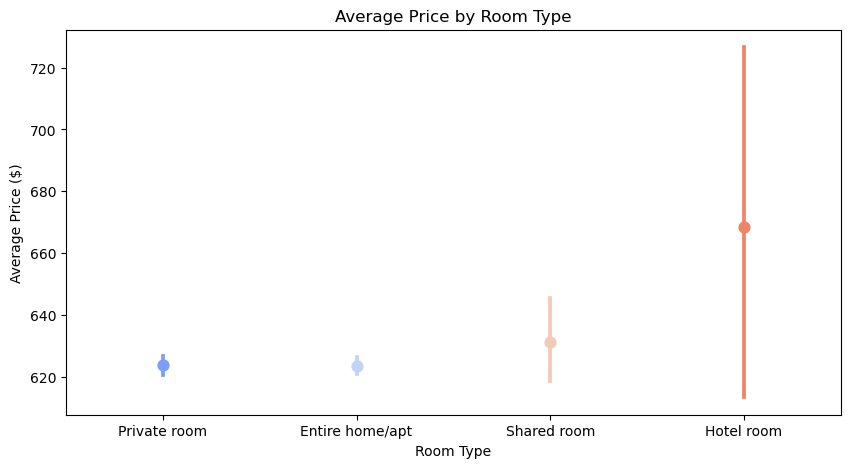

In [49]:
# Price Distribution Across different Room Types 
plt.figure(figsize=(10, 5))
x=sb.pointplot(data, x="Room_Type", y="Price",palette="coolwarm")
plt.title("Average Price by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average Price ($)")
plt.show()

**Key Insights From Average Price By Room Types**
+ Hotel Rooms Have High Price Variability – Hotel rooms show the widest price range About $670, with prices varying significantly.
+ Private Rooms & Entire Homes Have Similar Prices – Their average prices are close, suggesting comparable affordability.
+ Shared Rooms Are Slightly More Expensive – The average price is a bit higher than private rooms, possibly due to premium shared accommodations.


**Most Reviews By Different Room Type**

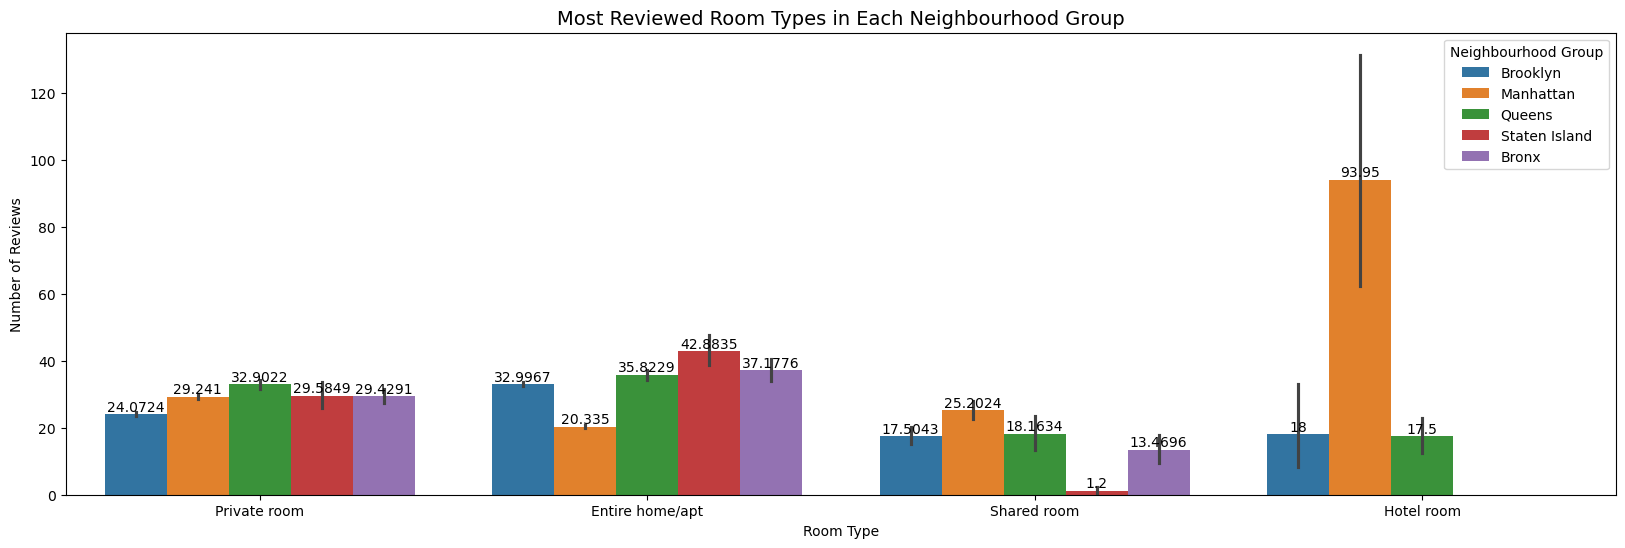

In [51]:

plt.figure(figsize=(20, 6))
a=sb.barplot(x=data.Room_Type,y=data.Number_Of_Reviews,hue=data.Neighbourhoodgroup,dodge=True)
a.bar_label(a.containers[0])
a.bar_label(a.containers[1])
a.bar_label(a.containers[2])
a.bar_label(a.containers[3])
a.bar_label(a.containers[4])

plt.title('Most Reviewed Room Types in Each Neighbourhood Group', fontsize=14)
plt.xlabel('Room Type')
plt.ylabel('Number of Reviews')
plt.legend(title='Neighbourhood Group')

plt.show()

**Number of Active Host per Neighbourhood Group Using Line Chart**

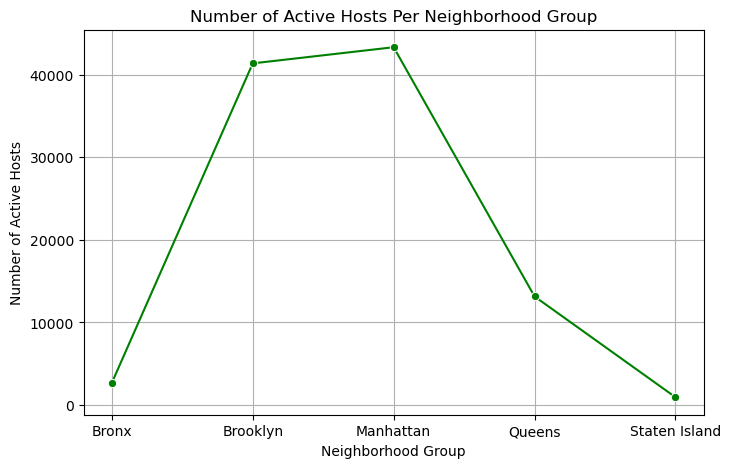

In [53]:
# Active Host With different Neighbourhood Group
active_hosts = data.groupby('Neighbourhoodgroup')['Host_Id'].nunique().reset_index()
plt.figure(figsize=(8, 5))
sb.lineplot(x='Neighbourhoodgroup', y='Host_Id', data=active_hosts, marker='o', color='Green')
plt.title('Number of Active Hosts Per Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of Active Hosts')
plt.grid(True)

plt.show()

In [54]:
active_hosts = data.groupby('Neighbourhoodgroup')['Host_Id'].nunique().reset_index()
active_hosts

,Neighbourhoodgroup,Host_Id
0,Bronx,2682
1,Brooklyn,41372
2,Manhattan,43328
3,Queens,13147
4,Staten Island,946


**Key Insights From Numbers of Active Hosts Per Neighbourhood**
+ Manhattan and Brooklyn have the highest number of active hosts, indicating a higher supply of rental properties.
+ Queens has a moderate number of hosts compared to Manhattan and Brooklyn, suggesting it may be preferred for budget travelers.
+ Staten Island and the Bronx have significantly fewer active hosts, indicating lower demand or limited availability of rental properties.

**Number of Active Host per Neighbourhood Using Line Chart**

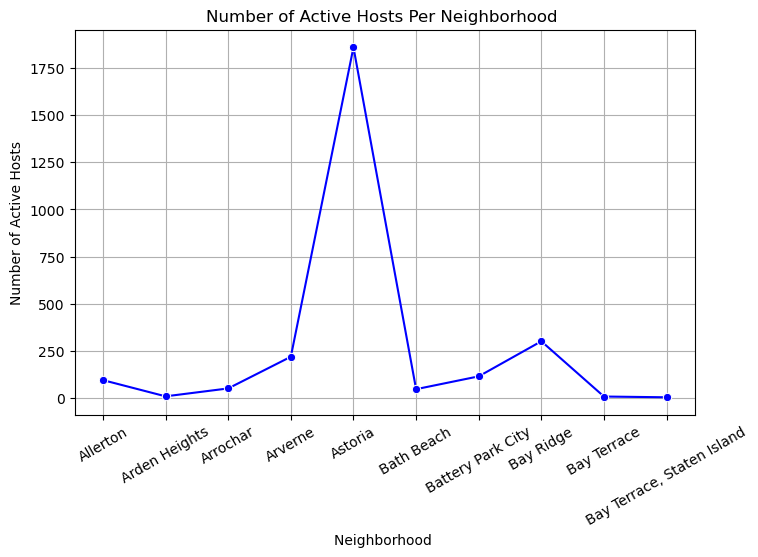

In [56]:
# Active Host With different Neighbourhood
active_hosts = data.groupby('Neighbourhood')['Host_Id'].nunique().reset_index().head(10)
plt.figure(figsize=(8, 5))
sb.lineplot(x='Neighbourhood', y='Host_Id', data=active_hosts, marker='o', color='Blue')
plt.title('Number of Active Hosts Per Neighborhood ')
plt.xlabel('Neighborhood ')
plt.ylabel('Number of Active Hosts')
plt.grid(True)
plt.xticks(rotation=30)
plt.show()

**Host Identity Verified number**

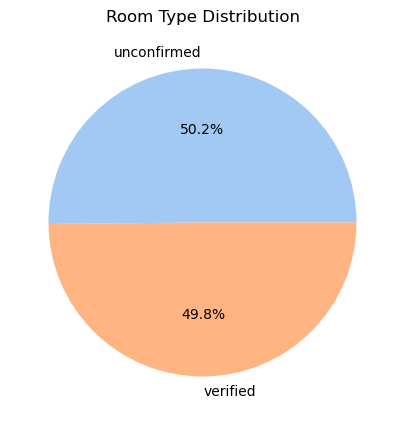

In [60]:
# check host_identity_verified or not
plt.figure(figsize=(8, 5))
sizes = data["Host_Identity_Verified"].value_counts()
colors = sb.color_palette("pastel")
plt.pie(sizes, labels=sizes.index, autopct="%1.1f%%", colors= sb.color_palette("pastel"))
plt.title("Room Type Distribution")
plt.show()

+ 50% Hosts shows  the unconfirmed identity while approximate 50% host have identity.

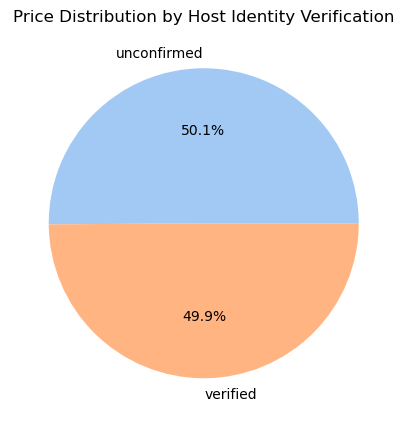

In [61]:
#Host_Identity_Verified Vs Price
price_distribution = data.groupby("Host_Identity_Verified")["Price"].mean()
plt.figure(figsize=(5,7))
plt.pie(price_distribution, labels=price_distribution.index, autopct='%1.1f%%', colors=colors)

plt.title("Price Distribution by Host Identity Verification")
plt.show()

**Key Insights From Price Distribution by Host Identity**
+ Nearly Equal Distribution- Both verified and unconfirmed hosts have similar price distributions.
+ The price distribution between verified and unconfirmed hosts is almost equal, with unconfirmed hosts slightly higher at 50.1% and verified hosts at 49.9%.
+ Verification does not seem to significantly impact the price of listings.
+ A large portion of hosts operate without identity verification, which may raise trust issues.

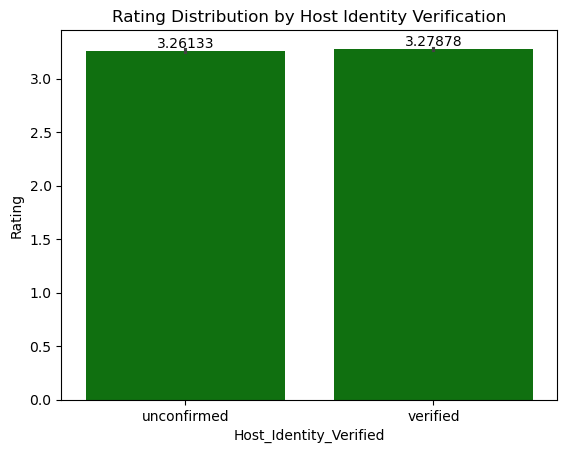

In [63]:
#Host_Identity_Verified Vs Rating
price_distribution = data.groupby("Host_Identity_Verified")["Rating"].mean()
x=sb.barplot(x=data.Host_Identity_Verified,y=data.Rating,color="g")
x.bar_label(x.containers[0])
plt.title("Rating Distribution by Host Identity Verification")
plt.show()

+ The Rating distribution between verified and unconfirmed hosts is almost equal, with unconfirmed hosts slightly less at 3.26 and verified hosts at 3.27.

In [65]:
data.Cancellation_Policy.unique()

array(['strict', 'moderate', 'flexible'], dtype=object)

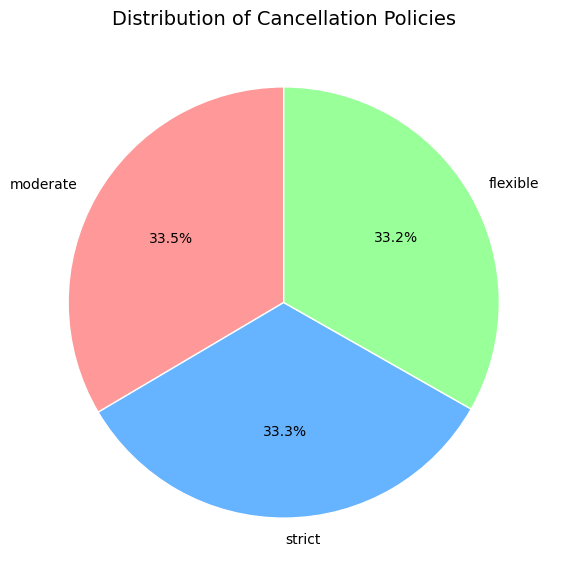

In [149]:
Cancel_Policy = data["Cancellation_Policy"].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(Cancel_Policy, labels=Cancel_Policy.index, autopct="%1.1f%%", colors=["#ff9999", "#66b3ff", "#99ff99"] , startangle=90, wedgeprops={'edgecolor': 'white'})
plt.title("Distribution of Cancellation Policies", fontsize=14)
plt.show()

**Key Insights From Distrinution Of Cancellation policy**  
**Even Distribution:**  
+ The three types of cancellation policies (Flexible, Moderate, and Strict) are almost evenly distributed. 
+ Moderate policies are slightly more popular at 33.5%, followed by Strict at 33.3% and Flexible at 33.2%.

**Host Strategy:**
+ Hosts offering Moderate policies may attract more bookings due to a balanced approach that benefits both parties.

**DESCRIPTIVE ANALYSIS:**

In [68]:
data.describe()

,Id,Host_Id,Latitude,Longitude,Construction_Year,Price,Service_Fee,Minimum_Nights,Number_Of_Reviews,Reviews_Per_Month,Rating,Calculated_Host_Listed_Count,Availability_In_Days,Last_Reviews
count,1.020160e+05,1.020160e+05,102016.000000,102016.000000,102016.000000,102016.000000,102016.000000,102016.000000,102016.000000,102016.000000,102016.000000,102016.000000,102016.000000,86202
mean,2.922093e+07,4.925055e+10,40.725286,-73.944554,2012.489149,623.885626,124.713496,8.127990,27.290229,1.161929,3.270026,7.931246,140.545865,2019-06-12 15:35:16.600542720
min,1.001254e+06,1.236005e+08,0.000000,-74.249840,2003.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012-07-11 00:00:00
25%,1.518702e+07,2.458271e+10,40.688738,-73.982580,2007.000000,338.000000,67.000000,1.000000,1.000000,0.090000,2.000000,1.000000,3.000000,2018-10-28 00:00:00
50%,2.922580e+07,4.910974e+10,40.722295,-73.954430,2012.000000,623.000000,125.000000,3.000000,7.000000,0.480000,3.000000,1.000000,95.000000,2019-06-14 00:00:00
75%,4.324083e+07,7.399673e+10,40.762760,-73.932318,2018.000000,912.000000,182.000000,5.000000,30.000000,1.710000,4.000000,2.000000,268.000000,2019-07-05 00:00:00
max,5.736742e+07,9.876313e+10,40.916970,0.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000,2058-06-16 00:00:00
std,1.621681e+07,2.854125e+10,0.341957,0.614546,5.765082,332.598734,66.535692,30.211399,49.260741,1.683112,1.294625,32.229451,135.397662,NaN


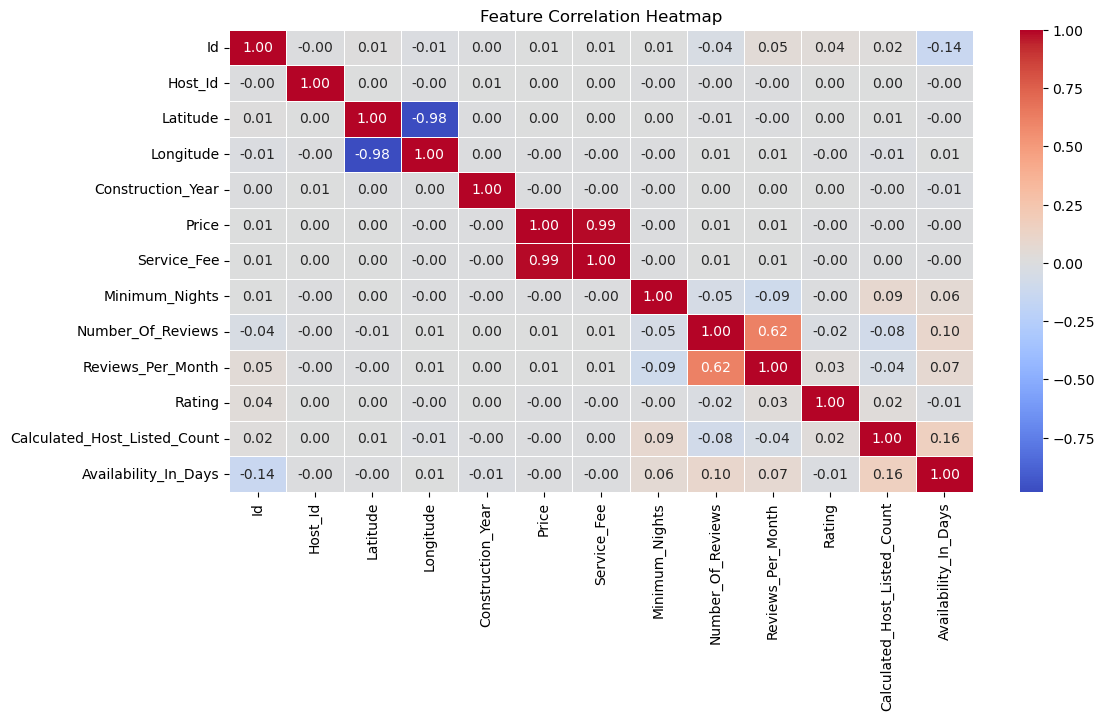

In [69]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_data.corr()

plt.figure(figsize=(12,6))
sb.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

**1.Weak Correlation/ No Correlation:**  
  + Most Of the parameters Have the Weak or No-Correlation Between Them.  
**2.Strongly Positive Correlation:**  
   + There is Strong positive Correlation Between Price And Service Fees.  
**3.Number of Reviews and Reviews Per Month:**  
  + A Postive Correlation(0.65) Between No.of Reviews and Reviews Per Month indicates that number of reviews tends to keeps properties avialable for Reviews Per month.  
**4. Strongly Negative Correlation:**  
  + There is Strongly Negative Correlation Between Latitude and Longitude.